# Initialize K Centroids

In [ ]:
import pandas as pd

customers = pd.read_csv('mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']

customers = customers[cols_to_keep].copy()

def get_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    print(centroids)
    coordinates = centroids.values.tolist()
    print(coordinates)
    return centroids, coordinates

centroids, coords = get_centroids(customers,2)

# Calculating Distances

In [ ]:
def calculate_distance(df, centroids_coords):
    names = []
    
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i + 1}'
        
        #creating new columns with the distances
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    
    return df, names


customers, dist_names = calculate_distance(customers, coords)

#Extracting cluster 1 or 2 of the column dist_names_xx
customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]

cols_to_keep = ['Annual Income', 'Spending Score']

centroids = customers.groupby('cluster').mean().reset_index().drop(['cluster'],axis=1)

print(customers)
print(dist_names)

# Scatter Plot

In [ ]:


# Plust clusters
sns.scatterplot(data=customers, x='Annual Income',y='Spending Score',hue='cluster')

# Plot the first centroid in red
sns.scatterplot(data=centroids.head(1), x='Annual Income', y='Spending Score', color='red', s=400)

# Plot the second centroid in blue
sns.scatterplot(data=centroids.tail(1), x='Annual Income', y='Spending Score', color='blue', s=400)
plt.show()



# Recalculating Centroids

In [ ]:
variables = customers.columns[:2] #ther two first columns are the data

new_centroids = round(customers.groupby('cluster')[variables].mean().reset_index().drop(['cluster'],axis=1),4)

new_coords = new_centroids.values.tolist()

# Creating an Iterative Process

In [ ]:
customers = pd.read_csv('mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

variables = customers.columns

centroids, coords = get_centroids(customers, 2)

for i in range(100):
    
    #create the columns containing the distance from each centroid in the customers DataFrame.
    customers, dist_names = calculate_distance(customers, coords)
    
    #Assingning cluster 1 or 2 of the column dist_names_xx
    customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]
    
    #Recalculate the centroids using groupby() and their coordinates.
    
    #The new centroids and coordinates must be assigned to the same variable as in the first initialization, and they should have the same datatypes.
    centroids = round(customers.groupby('cluster')[variables].mean().reset_index().drop(['cluster'],axis=1),4)
    
    coords = centroids.values.tolist()
    print(i+1)
    
    
    
    
#Create the scatter plot of the customers grouped by clusters
sns.scatterplot(data=customers, x='Annual Income',y='Spending Score',hue='cluster')    
plt.show()

# Stopping the Iteration

if coords == last_coords:
        break

In [ ]:
customers = pd.read_csv('mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

variables = customers.columns

centroids, coords  = get_centroids(customers, 2)

for i in range(100): 
    customers, dist_names = calculate_distance(customers, coords)

    customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]

    centroids = round(customers.groupby('cluster')[variables].mean(), 4)
    last_coords = coords
    coords = centroids.values.tolist()
    
    if coords == last_coords:
        break

print(f'Total Iterations: {i + 1}')
                    
sns.scatterplot('Annual Income', 'Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot('Annual Income', 'Spending Score', color='black', data=centroids, s=100)

plt.show()

# Kmeans as  Function

In [ ]:
customers = pd.read_csv('mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

def kmeans(df,k,iterations=100):
    variables = customers.columns

    centroids, coords  = get_centroids(df, 2)

    for i in range(iterations): 
        df, dist_names = calculate_distance(df, coords)

        df['cluster'] = df[dist_names].idxmin(axis=1).str.split('_').str[-1]

        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        last_coords = coords
        coords = centroids.values.tolist()

        if coords == last_coords:
            break

    print(f'Total Iterations: {i + 1}')
                    
    sns.scatterplot('Annual Income', 'Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
    sns.scatterplot('Annual Income', 'Spending Score', color='black', data=centroids, s=100)

    plt.show()
    return df['cluster']
    
clusters = kmeans(customers,2)
    


# Calculating Inertia 

 Inertia reflects how far the data points assigned to a cluster are from that cluster's centroid. Mathematically, inertia is the sum of the squared Euclidean distances from each of 
n
 data points to a centroid, as given by the following formula:

```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def kmeans(df, k, n_iterations=100):
    variables = df.columns

    centroids, coords = get_centroids(df, k)

    for i in range(n_iterations):
        last_coords = coords.copy()

        df, dists = calculate_distance(df, coords)

        df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1]

        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        coords = centroids.values.tolist()

        if last_coords == coords:
      	    break
       
       
       
       
    df['sqrt_dist_centroid'] = df.loc[:, dists].min(axis = 1)**2
    inertia = df['sqrt_dist_centroid'].sum()

    
    print(f'Total Iterations: {i + 1}')

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(variables[0], variables[1], hue='cluster', palette='tab10', data=df, s=50, ax=ax)
    sns.scatterplot(variables[0], variables[1], color='black', data=centroids, s=100, ax=ax)


    plt.tight_layout()
    plt.show()

    return df['cluster'], inertia


customers = pd.read_csv('mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

clusters,inertia = kmeans(customers,2)

print("inertia:",inertia)``

# Iterate over Inertias
In order to increase our cost by increasing the number of clusters by one, we must have a gain in inertia or, in other words, a better model. We should stop adding clusters when the gain in inertia increases at lower and lower rates. In economics, this is called diminishing returns.

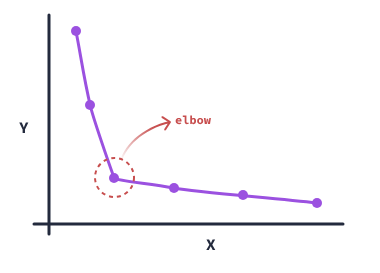

In [ ]:
inertias = []

for i in range(1,11):
    c,inertia = kmeans(customers,i,plot=True)
    inertias.append(inertia)
    print(inertia)
    
print(inertias)

plt.plot(range(1,11),inertias,marker='o')
plt.show()

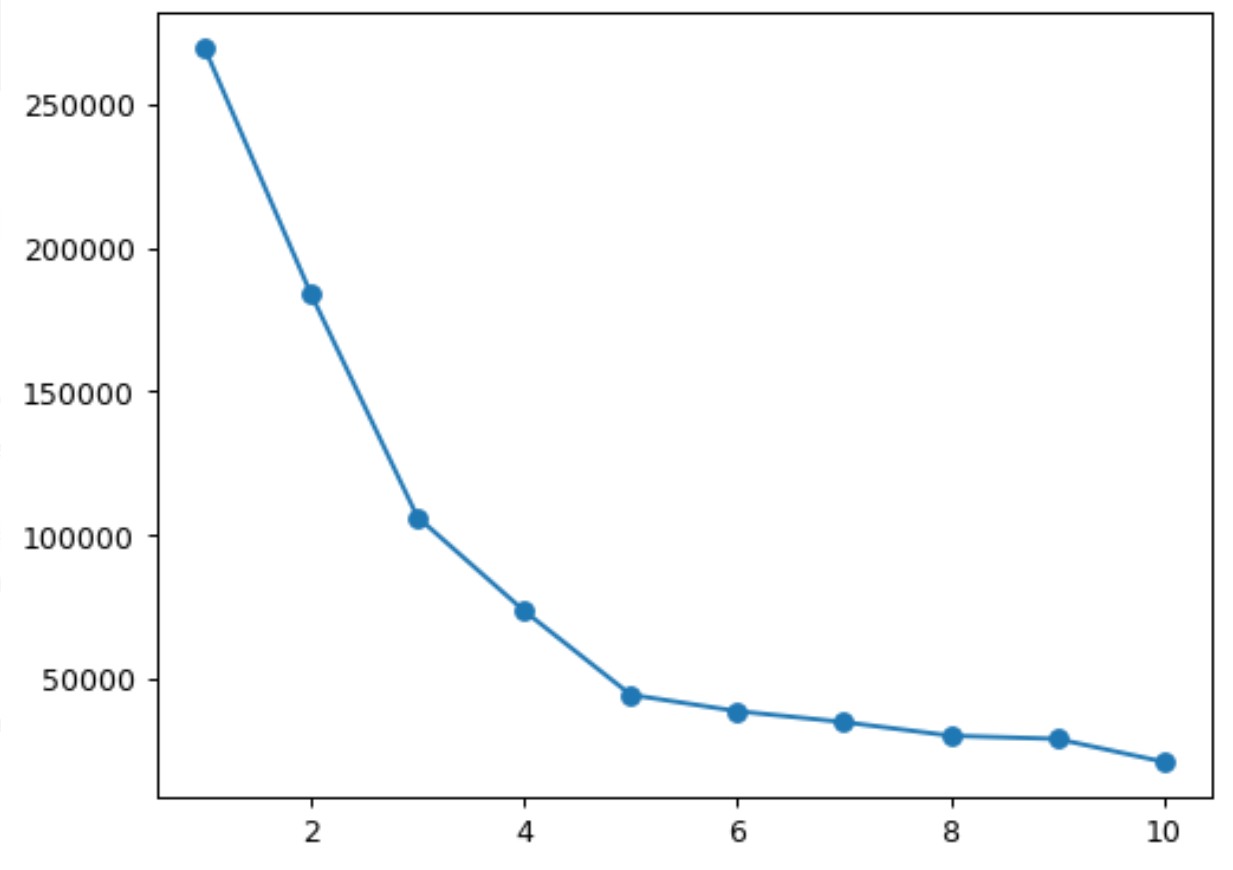